<a href="https://colab.research.google.com/github/akhilerla/IT496/blob/main/AkhilE_DuPontAnalysis_SecurityDuPontAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
myAPIKey = 'bd9821e7f65af730136944c623b76088'
stock ="CSCO"
balanceStatements = requests.get (f"https://financialmodelingprep.com/api/v3/balance-sheet-statement/{stock}?apikey={myAPIKey}").json()
incomeStatements= requests.get(f"https://financialmodelingprep.com/api/v3/income-statement/{stock}?apikey={myAPIKey}").json()


In [ ]:
print (balanceStatements[:4])

[{'date': '2021-07-31', 'symbol': 'CSCO', 'reportedCurrency': 'USD', 'cik': '0000858877', 'fillingDate': '2021-09-09', 'acceptedDate': '2021-09-09 16:39:49', 'calendarYear': '2021', 'period': 'FY', 'cashAndCashEquivalents': 9175000000, 'shortTermInvestments': 15343000000, 'cashAndShortTermInvestments': 24518000000, 'netReceivables': 10146000000, 'inventory': 1559000000, 'otherCurrentAssets': 2889000000, 'totalCurrentAssets': 39112000000, 'propertyPlantEquipmentNet': 2338000000, 'goodwill': 38168000000, 'intangibleAssets': 3619000000, 'goodwillAndIntangibleAssets': 41787000000, 'longTermInvestments': 0.0, 'taxAssets': 4360000000, 'otherNonCurrentAssets': 9900000000, 'totalNonCurrentAssets': 58385000000, 'otherAssets': 0.0, 'totalAssets': 97497000000, 'accountPayables': 2362000000, 'shortTermDebt': 2508000000, 'taxPayables': 801000000, 'deferredRevenue': 12148000000, 'otherCurrentLiabilities': 9239000000, 'totalCurrentLiabilities': 26257000000, 'longTermDebt': 9018000000, 'deferredRevenu

In [ ]:
#the numbers from the two most recent years
twoYearBalanceStatement= balanceStatements[:4]
twoYearIncomeStatement = incomeStatements[:4]

In [ ]:

#calculate profitability, assetTurnover, and capitalstructure
profitability=[]
assetTurnOver=[]
capitalStructure=[]
returnOnEquity=[]
dates =[]
#gettting details
for i in range (0,4):
   profitabilityValue = twoYearIncomeStatement[i]['netIncome']/twoYearIncomeStatement[i]['revenue']
   profitability. append(profitabilityValue)
   assetTurnOverValue= twoYearIncomeStatement[i]['revenue']/twoYearBalanceStatement[i]['totalAssets']
   assetTurnOver.append(assetTurnOverValue)
   capitalStructureValue=twoYearBalanceStatement[i]['totalAssets']/twoYearBalanceStatement[i]['totalStockholdersEquity']
   capitalStructure.append(capitalStructureValue)
   returnOnEquityValue=profitabilityValue * assetTurnOverValue * capitalStructureValue
   returnOnEquity.append(returnOnEquityValue)
   dates.append(twoYearIncomeStatement[i]['date'])

  

In [ ]:
print(returnOnEquity)
print(dates)



[0.2565960024227741, 0.29572784810126584, 0.3461618658961604, 0.0025460605499490786]
['2021-07-31', '2020-07-25', '2019-07-27', '2018-07-28']


In [ ]:
from collections import defaultdict
df1 = pd.DataFrame(columns = ['year','profitability','assetTurnOver','capitalStructure','returnOnEquity'] )
df1['profitability'] =  profitability
df1['assetTurnOver'] =  assetTurnOver
df1['capitalStructure'] = capitalStructure
df1['returnOnEquity']  = returnOnEquity
df1['year']  = dates
print(df1)

         year  profitability  assetTurnOver  capitalStructure  returnOnEquity
0  2021-07-31       0.212594       0.510970          2.362132        0.256596
1  2020-07-25       0.227460       0.519762          2.501398        0.295728
2  2019-07-27       0.223894       0.530754          2.913020        0.346162
3  2018-07-28       0.002230       0.453467          2.517915        0.002546


In [ ]:
df1 = df1[::-1]

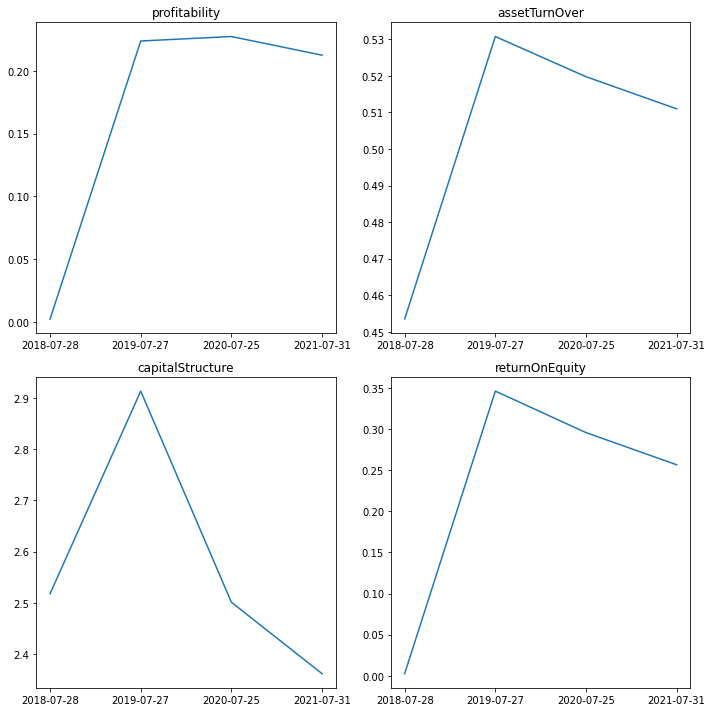

In [ ]:
fig, axs= plt.subplots(2,2, figsize=(10,10))
#set x for all of them
x= df1['year']
#loop version
values= ['profitability', 'assetTurnOver', 'capitalStructure', 'returnOnEquity']
for i in range(0,2):
    for j in range(0, 2):
      valueIndex = i*2+j
      axs[i,j].plot (x, df1[values[valueIndex]])
      axs[i,j].set_title(values[valueIndex])
      fig.tight_layout()


In [ ]:
The capital structure graph  an inverted "V" shape  we have here . that means there is a steep increase in middle but came to the place where it was before .
from what i can see tech companies did well in covid-19 years that is why there is an increase after that it came back to normal